In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

# World Happiness report project

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In this dataset we have total 12 columns from which "Happiness Score" is our target variable and rest of the columns are input which will help us find our output from the dataset we have others columns like "Region","Country","GDP","Family" and "Health".

In [3]:
df.shape
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 158
Number of Columns 12


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Dividing the data into numerical and categorical also checked whether dataset contains any null value.

In [8]:
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns: ",cat_col)

num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= "object":
        num_col.append(i)
print("Numerical Columns: ",num_col)

Categorical Columns:  ['Country', 'Region']
Numerical Columns:  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [9]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

Null values in the dataset is also checked using the heatmap which gives very much clear picture.

<Axes: >

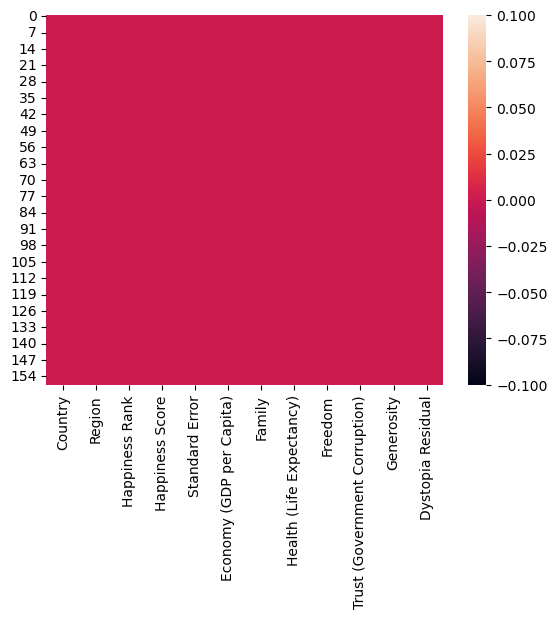

In [10]:
sns.heatmap(df.isnull())

Checking the value counts of "Region" columns as we can see in Sub-Saharan Africa survey is done more as compare to other region and lowest survey is done in North America, Australia and New Zealand.

In [11]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

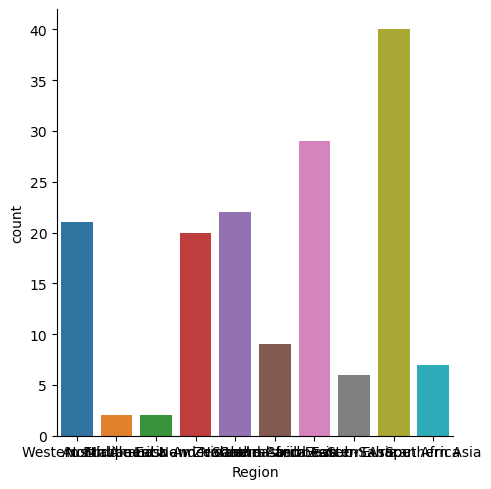

In [12]:
sns.catplot(x = "Region", data = df, kind = "count")

Happiness Rank                      Axes(0.125,0.53;0.133621x0.35)
Happiness Score                  Axes(0.285345,0.53;0.133621x0.35)
Standard Error                    Axes(0.44569,0.53;0.133621x0.35)
Economy (GDP per Capita)         Axes(0.606034,0.53;0.133621x0.35)
Family                           Axes(0.766379,0.53;0.133621x0.35)
Health (Life Expectancy)            Axes(0.125,0.11;0.133621x0.35)
Freedom                          Axes(0.285345,0.11;0.133621x0.35)
Trust (Government Corruption)     Axes(0.44569,0.11;0.133621x0.35)
Generosity                       Axes(0.606034,0.11;0.133621x0.35)
Dystopia Residual                Axes(0.766379,0.11;0.133621x0.35)
dtype: object

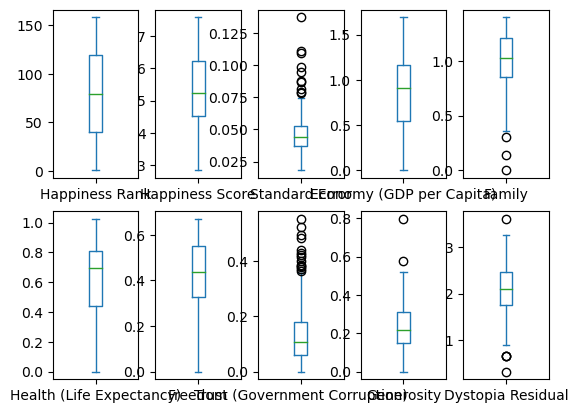

In [13]:
df.plot(kind="box", subplots=True, layout=(2,5))

Checking out the outliers present in the data which results that there is not much outliers present. Outliers is present in specific Columns only for more clear picture box plot of the columns which contains outliers are shown below.

<Axes: >

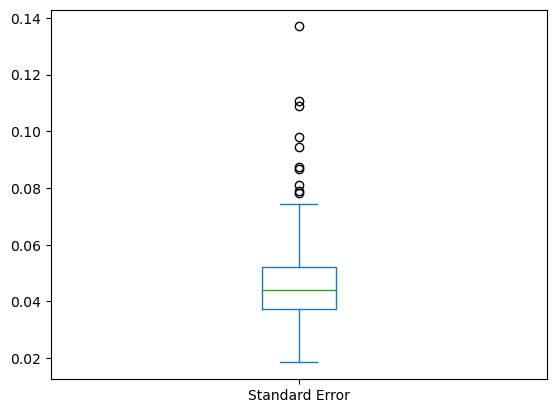

In [14]:
df["Standard Error"].plot.box()

<Axes: >

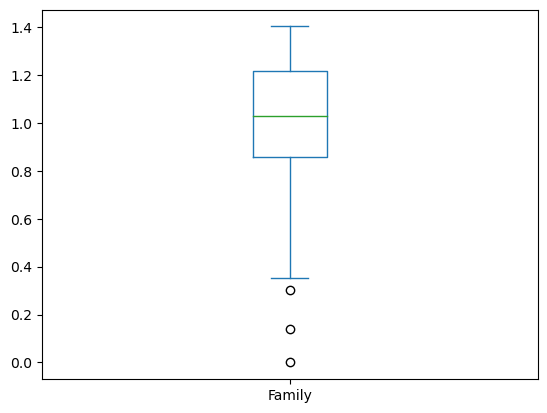

In [15]:
df["Family"].plot.box()

<Axes: >

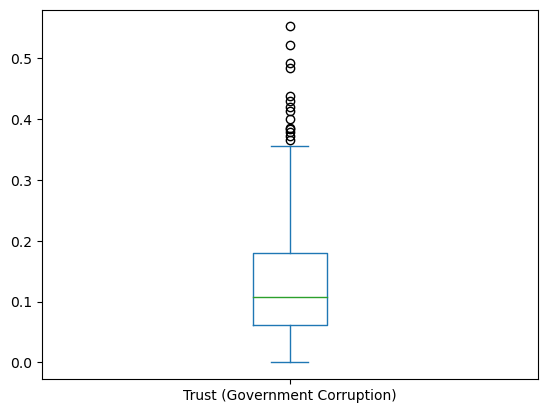

In [16]:
df["Trust (Government Corruption)"].plot.box()

<Axes: >

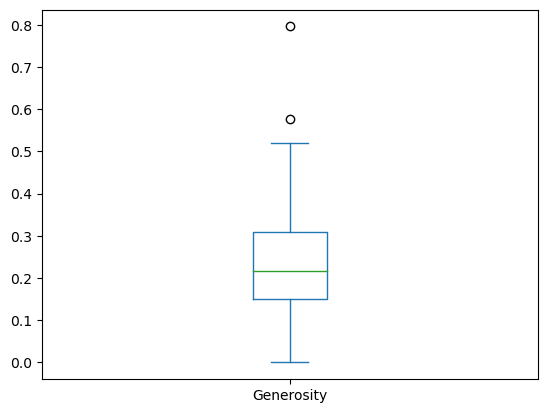

In [17]:
df["Generosity"].plot.box()

<Axes: >

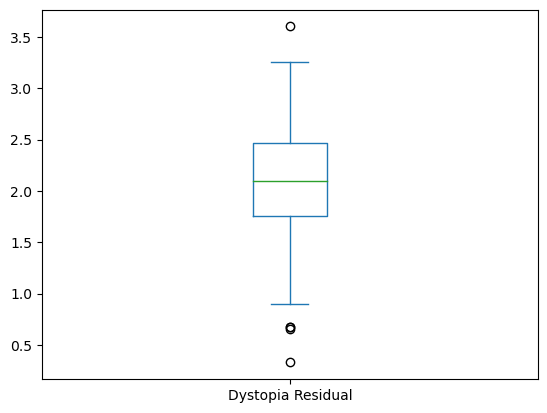

In [18]:
df["Dystopia Residual"].plot.box()

In [19]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


As there are not many outliers present proceeding futher without removing outliers from the dataset.

In [20]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [21]:
df["Region"]=df["Region"].map({"Sub-Saharan Africa":0,"Central and Eastern Europe":1,
                               "Latin America and Caribbean":2,"Western Europe":3,
                               "Middle East and Northern Africa":4,"Southeastern Asia":5,
                               "Southern Asia":6,"Eastern Asia":7,
                               "North America":8,"Australia and New Zealand":9})

Converting the Region column into numerical from object datatype to integer datatype as further analysis and training and testing work smoothly on numerical data and also gives better results. As Region columns have only 10 unique value which is minimum as compare to country column hence conversion is done.

In [22]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,3,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,3,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,8,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
df.drop(["Country"], axis = 1, inplace=True)

In [24]:
df.sample(10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
32,2,33,6.477,0.05051,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,2.85737
109,4,110,4.686,0.04449,1.00880,0.54447,0.69805,0.30033,0.05863,0.38086,1.69440
153,0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
139,0,140,3.956,0.04797,0.23906,0.79273,0.36315,0.22917,0.19900,0.17441,1.95812
106,4,107,4.739,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431,2.12466
8,9,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
144,5,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
92,1,93,5.007,0.05376,0.91851,1.00232,0.73545,0.33457,0.05327,0.22359,1.73933
14,8,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
29,2,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [25]:
x = df.drop(["Happiness Score"], axis = 1)
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,3,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,3,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,8,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,0,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [26]:
y = df["Happiness Score"]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

Splitting the data into X and Y where Y contains output "Happiness Score" and rest are saved in X variable.

In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [28]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((126, 10), (32, 10), (126,), (32,))

In [29]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_LR

array([4.3068773 , 5.98713291, 4.19422502, 2.90459409, 5.05723015,
       6.57408734, 4.89751576, 4.8759827 , 4.94867509, 3.93078339,
       6.90138468, 5.82830865, 6.98261233, 5.54820011, 6.78624611,
       6.50512433, 4.50714023, 4.68553193, 4.97109767, 5.69529698,
       3.65506502, 6.93738435, 7.19982634, 7.28397923, 6.485165  ,
       5.19232833, 5.88903676, 3.95561313, 4.36911826, 3.68085915,
       3.78076361, 5.3325127 ])

In [30]:
from sklearn import metrics

In [31]:
sc = metrics.r2_score(y_test,pred_LR)
sc

0.9999999479465266

In [32]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)
pred_svm

array([4.22795081, 6.11921308, 4.08110701, 3.59499272, 5.07198131,
       6.608798  , 4.95106737, 4.90931482, 4.97100449, 3.93728305,
       6.92088585, 5.81748907, 7.03982133, 5.50600485, 6.76573018,
       6.57677724, 4.37386335, 4.67418729, 5.01191705, 5.59706286,
       3.71302143, 6.95114518, 7.12738709, 7.20389348, 6.5460957 ,
       5.25235519, 5.95004871, 3.96104009, 4.30100128, 3.79948421,
       3.82176944, 5.37625107])

In [33]:
sc_svm = metrics.r2_score(y_test,pred_svm)
sc_svm

0.9866231915091763

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)
pred_rfr

array([4.27983, 5.97858, 4.19965, 3.19751, 5.07283, 6.62272, 4.88424,
       4.84853, 4.94846, 3.89145, 6.90962, 5.83944, 7.06341, 5.56938,
       6.8233 , 6.55576, 4.49241, 4.68027, 5.01447, 5.69602, 3.59364,
       6.91994, 7.2926 , 7.33806, 6.45616, 5.19041, 5.88411, 3.95345,
       4.37237, 3.68787, 3.83311, 5.35786])

In [35]:
sc_rfr = metrics.r2_score(y_test,pred_rfr)
sc_rfr

0.9972548722496578

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)
pred_gbr

array([4.33184014, 5.99918274, 4.20421132, 2.95117101, 5.07284337,
       6.5711149 , 4.88641943, 4.88336659, 4.96041037, 3.90251611,
       6.86738793, 5.82792006, 7.12184612, 5.59087391, 6.79812643,
       6.57039905, 4.51549914, 4.70059099, 5.00247192, 5.70810319,
       3.65406616, 6.94023379, 7.22419291, 7.31141916, 6.47591447,
       5.1929298 , 5.88896066, 3.98748005, 4.42265018, 3.67630309,
       3.80644179, 5.35536186])

In [37]:
sc_gbr = metrics.r2_score(y_test,pred_gbr)
sc_gbr

0.9991404272314501

In [38]:
print("Results from Linear Regression :",sc)
print("Results from SVR :",sc_svm)
print("Results from Random Forest Regressor :",sc_rfr)
print("Results from Gradient Boosting Regressor :", sc_gbr)

Results from Linear Regression : 0.9999999479465266
Results from SVR : 0.9866231915091763
Results from Random Forest Regressor : 0.9972548722496578
Results from Gradient Boosting Regressor : 0.9991404272314501


As we have used many models for testing the best results we have received is from Linear Regerssion and we have created the prediction model using the same Linear Regression. The second best result we have received is from Gradient Boosting Regressor.

In [39]:
data = (3,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = LR.predict(data_reshaped)
print("The Happiness score is :",prediction)

The Happiness score is : [7.58691237]


The prediction Model is created which is giving happiness score as per the data entered in it.

# Titanic Survived Project

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In this dataset we have total 891 rows and 12 columns from which "Survived" columns is the target variable as rest of the columns are input we have create the prediction model for the same which will perdict person has survived or not survived.

In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
df.shape
print("Rows from the dataset is ",df.shape[0])
print("Columns from the dataset is",df.shape[1])

Rows from the dataset is  891
Columns from the dataset is 12


In [43]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see there is lot of missing value present in data which is replaced with NAN, in Cabin column we have most missing values from 891 rows 687 rows have missing values, and the same is with age column 177 rows have missing values in the dataset.

In [45]:
df.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,NaN,S


Further we have just checked the missing values contain in dataset using sample of 15.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [48]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [49]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [50]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

As we have checked cabin column have mostly missing value we can fill the missing value or we can drop the column, Here we have dropped the cabin column.

In [51]:
df = df.drop(columns = "Cabin", axis = 1)

In [52]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,S
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,S
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.0500,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,C


In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [54]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [55]:
print(df["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [56]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

As there was missing values in Age and Embarked column as we have dropped the cabin column, we will not drop the column this time which may lead to huge data loss so we will fill the missing values.
Age columns missing values are  filled with the mean of the age column.
Embarked column missing value is filled with the mode as there was only 02 missing values.

In [57]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

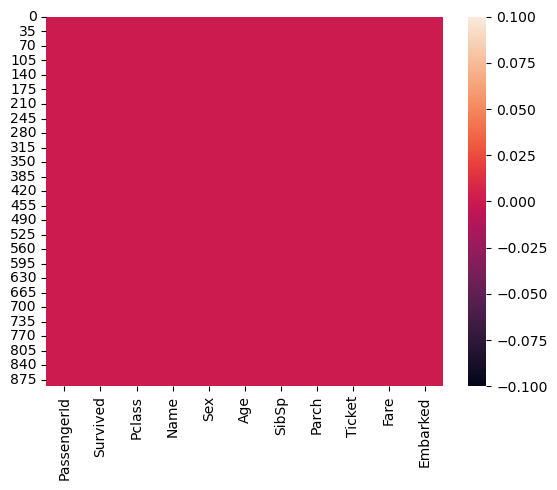

In [58]:
sns.heatmap(df.isnull())

Now there is no null values in the dataset as we have filled some columns and we have dropped one column we have checked it with the heatmap which gives us very much clear picture of the dataset.

In [59]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Sex', ylabel='count'>

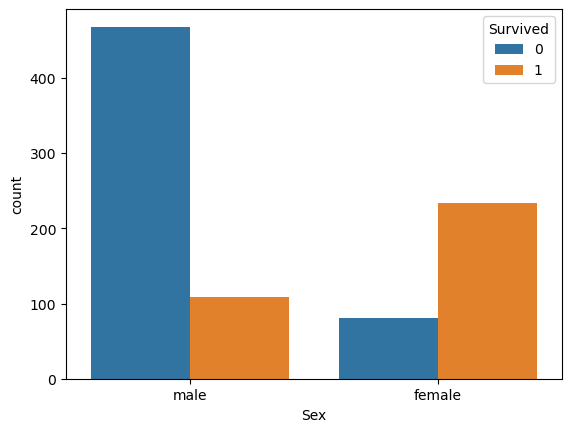

In [60]:
sns.countplot(x= "Sex", hue="Survived" , data = df)

We can see here how many male and female were survived in the accident 0 is not survived and 1 is survived.

<Axes: xlabel='Pclass', ylabel='count'>

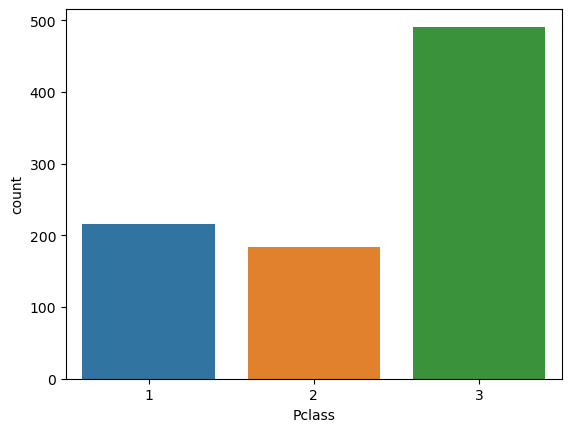

In [61]:
sns.countplot(x="Pclass", data= df)

<Axes: xlabel='Pclass', ylabel='count'>

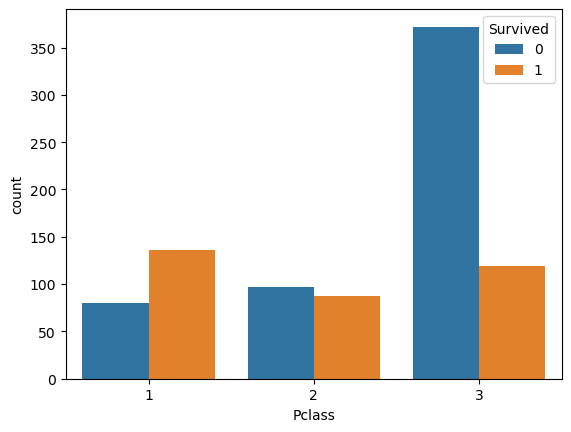

In [62]:
sns.countplot(x="Pclass", hue="Survived", data=df)

As per the class Type how many people have lost there life in the accident has been shown form above visualization.

In [63]:
df["Sex"] = df["Sex"].map({"female":0,"male":1})

Here we are converting the categorical data into numerical data for the better results and smooth functioning.
Female is defined as 0 where as male is defined as 1.
we have also conversion in Embarked column.

In [64]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
df["Embarked"] = df["Embarked"].map({"S":0,
                                    "C":1,
                                    "Q":2})

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [67]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [68]:
x = df.drop(["PassengerId","Name","Ticket",'Fare',"Survived"], axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.000000,1,0,0
1,1,0,38.000000,1,0,1
2,3,0,26.000000,0,0,0
3,1,0,35.000000,1,0,0
4,3,1,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,0
887,1,0,19.000000,0,0,0
888,3,0,29.699118,1,2,0
889,1,1,26.000000,0,0,1


In [69]:
y = df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Dropping the columns and splitting the data into X and Y, In Y we have our output variable "Survived", and we have dropped non-numerical columns from the dataset for further proceedings.

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [71]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [72]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [73]:
pred = LR.predict(x_test)
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
print(accuracy_score(y_test,pred))

0.8100558659217877


In [76]:
sc_lr = accuracy_score(y_test,pred)
sc_lr

0.8100558659217877

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
pred_rfc = rfc.predict(x_test)
pred_rfc

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [79]:
print(accuracy_score(y_test,pred_rfc))

0.8156424581005587


In [80]:
sc_rfc = accuracy_score(y_test,pred_rfc)
sc_rfc

0.8156424581005587

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [82]:
pred_etc = etc.predict(x_test)
pred_etc

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [83]:
print(accuracy_score(y_test,pred_etc))

0.8156424581005587


In [84]:
sc_etc= accuracy_score(y_test,pred_etc)
sc_etc

0.8156424581005587

In [85]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [86]:
pred_svm = svm.predict(x_test)
pred_svm

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [87]:
print(accuracy_score(y_test,pred_svm))

0.6089385474860335


In [88]:
sc_svm = accuracy_score(y_test,pred_svm)
sc_svm

0.6089385474860335

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
pred_dtc = dtc.predict(x_test)
pred_dtc

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [91]:
print(accuracy_score(y_test,pred_dtc))

0.7653631284916201


In [92]:
sc_dtc = accuracy_score(y_test,pred_dtc)
sc_dtc

0.7653631284916201

In [93]:
from sklearn.naive_bayes import GaussianNB
G = GaussianNB()
G.fit(x_train,y_train)

GaussianNB()

In [94]:
pred_g = G.predict(x_test)
pred_g

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [95]:
print(accuracy_score(y_test,pred_g))

0.7653631284916201


In [96]:
sc_g = accuracy_score(y_test,pred_g)
sc_g

0.7653631284916201

We have received the Best result using the Random Forest Classifier and Exta Tree Classifier and the second best result is received from Logistic Regression, We have further created the model using Random Forest Classifier.

In [97]:
print("Results of Logistic Regression :",sc_lr)
print("Results of Random Forest Classifier :",sc_rfc)
print("Results of Decision Tree Classifier :",sc_dtc)
print("Results of SVC :",sc_svm)
print("Results of GaussianNB :",sc_g)
print("Results of Exta Tree Classifier :",sc_etc)

Results of Logistic Regression : 0.8100558659217877
Results of Random Forest Classifier : 0.8156424581005587
Results of Decision Tree Classifier : 0.7653631284916201
Results of SVC : 0.6089385474860335
Results of GaussianNB : 0.7653631284916201
Results of Exta Tree Classifier : 0.8156424581005587


In [98]:
data = (3,0,26.0,0,0,0)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = rfc.predict(data_reshaped)
print(prediction)

[1]


In [99]:
if (prediction[0]==1):
    print("Survived")
else:
    print("Not Survived")

Survived


Prediction model is created to predict on the basis of data that passenger is survived or not survived in the accident we have used Random Forest Classifier in the prediction model which is giving the results.